In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Árboles de decisión

In [4]:
data = load_breast_cancer()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
vars_cols = list(df)
df['target'] = data['target']
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Modelo

### Entrenamiento

Se dividen los datos de entrenamiento y evaluación. Se emplean los primeros para ajustar el modelo de árbol de decisión.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df[vars_cols], df.target,
                                                    test_size=0.33, random_state=0)

model = DecisionTreeClassifier(min_samples_leaf=10, ccp_alpha=0.01)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, min_samples_leaf=10)

### Evaluación

Se analizan las predicciones del modelo en el conjuntode datos de evaluación

In [60]:
y_pred = model.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_report = metrics.classification_report(y_test, y_pred)

Gráfica de matriz de confusión

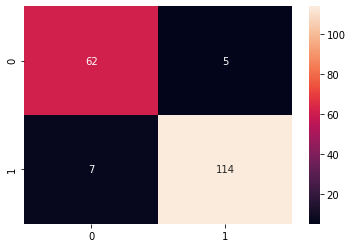

In [61]:
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.show()

In [62]:
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        67
           1       0.96      0.94      0.95       121

    accuracy                           0.94       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



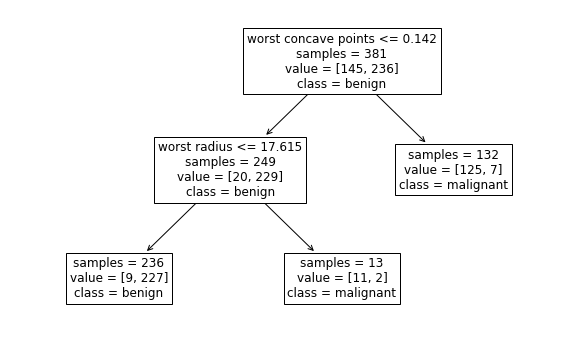

In [65]:
plt.figure(figsize=(10,6))
plot_tree(model,
          feature_names=list(data['feature_names']),
          class_names=list(data['target_names']),
          impurity=False,
          fontsize=12)
plt.show()